## Analysing Bahasa Indonesia News - detik.com

In [1]:
from __future__ import division

In [2]:
import pandas as pd
import numpy as np
from urllib2 import urlopen
from bs4 import BeautifulSoup
from requests import get
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output
import sys
reload(sys)
sys.setdefaultencoding('utf8')
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter

In [3]:
import csv

In [5]:
from string import punctuation

In [6]:
detikcom = pd.read_csv("detikcom.csv")

In [7]:
detikcom = detikcom.drop(columns=['Unnamed: 0'])

In [8]:
detikcom

,newstitle
0,"Soal Proyek Tol Yogya-Bawen, Kemenko Ekonomi: ..."
1,Akses dari Tol Trans Jawa ke Jalan Nasional Ma...
2,Bendungan Mila Siap Alirkan Air ke 1.689 Ha La...
3,Pejabat Kementerian PUPR Kena OTT KPK
4,"Bertemu Jokowi, Ridwan Kamil Ingin Situ Bagend..."
5,Jokowi Tinjau Bantuan Rusun di Ponpes Ustaz Ad...
6,5 Objek Wisata Populer Jawa Tengah yang Tak Ka...
7,Apiknya Rusun di Pesantren Garut yang Dikunjun...
8,Warga Padang Nikmati Program Hibah Air
9,Melihat Infrastruktur Jalan dan Jembatan di Pu...


In [9]:
import csv
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

In [11]:
tags_lower = detikcom['newstitle'].str.lower().str.cat(sep = ' ')

In [12]:
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

In [13]:
stop_words = list(get_stop_words('id'))

In [14]:
nltk_words = list(stopwords.words('indonesian'))

In [15]:
stop_words.extend(nltk_words)

In [16]:
word_tokens_tags = word_tokenize(tags_remove_pun)

In [17]:
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]

In [18]:
filtered_sentence_tags = []

In [19]:
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

In [20]:
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

In [21]:
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isdigit()]    

In [22]:
top_N = 10000

In [23]:
word_dist_tags = nltk.FreqDist(cleaned_data_tags)

In [24]:
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N), columns = ['Word', 'Frequency'])

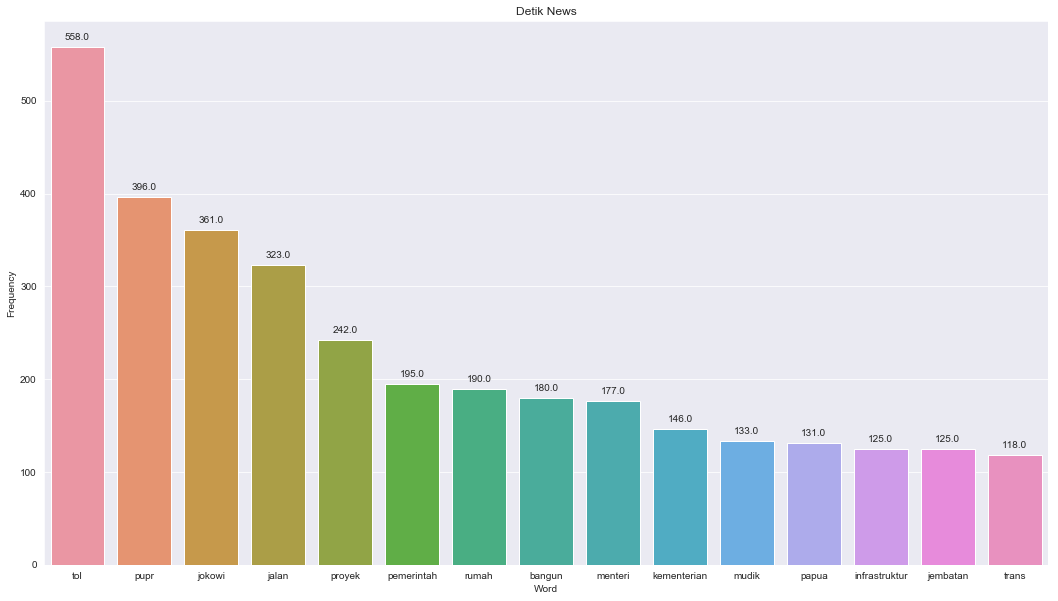

In [27]:
plt.figure(figsize=(18,10))
sns.set_style('darkgrid')
plt.title('Detik News')

ax = sns.barplot(x = 'Word', y = 'Frequency', data = rslt_tags.head(15))


rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)

In [28]:
bloblist_desc = list()


In [42]:
from translate import Translator
translator= Translator(from_lang="id", to_lang="en")

In [51]:
train_descr_str=detikcom['newstitle'].astype(str)
for row in train_descr_str:
    an = translator.translate(row)
    blob = TextBlob(an)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    train_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])


ConnectionError: ('Connection aborted.', error(54, 'Connection reset by peer'))

In [52]:
an

u'MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  05 HOURS 10 MINUTES 50 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE'

In [53]:
blob

TextBlob("MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  05 HOURS 10 MINUTES 50 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE")

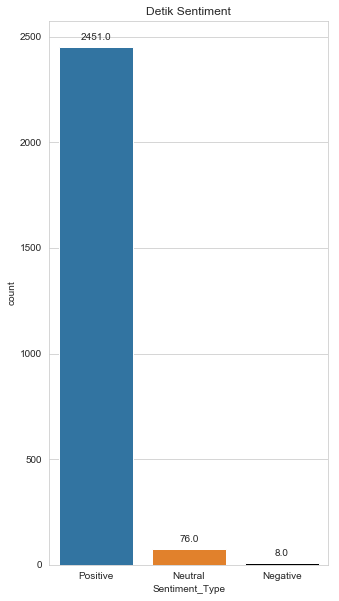

In [60]:
 
def f(train_polarity_desc):
    if train_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif train_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train_polarity_desc['Sentiment_Type'] = train_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("whitegrid")
plt.title('Detik Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc, palette=["C0", "C1", "k"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)


In [59]:
train_polarity_desc

,sentence,sentiment,polarity,Sentiment_Type
0,"Soal Proyek Tol Yogya-Bawen, Kemenko Ekonomi: ...",0.250000,0.375000,Positive
1,Akses dari Tol Trans Jawa ke Jalan Nasional Ma...,0.000000,0.000000,Neutral
2,Bendungan Mila Siap Alirkan Air ke 1.689 Ha La...,0.200000,0.500000,Positive
3,Pejabat Kementerian PUPR Kena OTT KPK,0.000000,0.066667,Neutral
4,"Bertemu Jokowi, Ridwan Kamil Ingin Situ Bagend...",0.200000,0.100000,Positive
5,Jokowi Tinjau Bantuan Rusun di Ponpes Ustaz Ad...,0.000000,0.000000,Neutral
6,5 Objek Wisata Populer Jawa Tengah yang Tak Ka...,0.300000,0.575000,Positive
7,Apiknya Rusun di Pesantren Garut yang Dikunjun...,0.000000,0.000000,Neutral
8,Warga Padang Nikmati Program Hibah Air,0.400000,0.500000,Positive
9,Melihat Infrastruktur Jalan dan Jembatan di Pu...,0.000000,0.000000,Neutral


In [4]:
sentimendetik = pd.read_csv("detikNewsSentiment.csv")

In [6]:
sentimendetik.drop(columns=['Unnamed: 0'], inplace = True)

In [8]:
sentimendetik  = sentimendetik.rename(columns = {"sentiment": "polarity", "polarity":"subjectivity"})

In [13]:
sentimendetik

,sentence,polarity,subjectivity,Sentiment_Type
0,"Soal Proyek Tol Yogya-Bawen, Kemenko Ekonomi: ...",0.250000,0.375000,Positive
1,Akses dari Tol Trans Jawa ke Jalan Nasional Ma...,0.000000,0.000000,Neutral
2,Bendungan Mila Siap Alirkan Air ke 1.689 Ha La...,0.200000,0.500000,Positive
3,Pejabat Kementerian PUPR Kena OTT KPK,0.000000,0.066667,Neutral
4,"Bertemu Jokowi, Ridwan Kamil Ingin Situ Bagend...",0.200000,0.100000,Positive
5,Jokowi Tinjau Bantuan Rusun di Ponpes Ustaz Ad...,0.000000,0.000000,Neutral
6,5 Objek Wisata Populer Jawa Tengah yang Tak Ka...,0.300000,0.575000,Positive
7,Apiknya Rusun di Pesantren Garut yang Dikunjun...,0.000000,0.000000,Neutral
8,Warga Padang Nikmati Program Hibah Air,0.400000,0.500000,Positive
9,Melihat Infrastruktur Jalan dan Jembatan di Pu...,0.000000,0.000000,Neutral
